In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [25]:
data = pd.read_csv('/kaggle/input/ml-new/ML_DATA.csv')
data.head()

,sex,Number of family members,age,Marital Status,Education Level,Occupation,BMI (Body Mass Index) Category,Female Waist Circumference,Male Waist Circumference,feshrdarj2,Menopause,History of Heart Disease,History of Brain Consumption,History of Diabetes,History of Cancer,History of Asthma,History of Liver diseases,History of anemia,History of Anxiety,History of High Blood Pressure,History of hyperlipidemia,Q1a,Q2a,ros+,rosegradeee,WHS1,GADrotbe,Q1,Q2,diabetcas,diabeti,serumvitDrotb,dyslipd,metabolicsyndrome,activity,Physicalactiv,waisttoheightratio,total blood pressure,prehyper,hyper1,hyper2,cottage bread,oliy bread,white rice,whole grain rice,low fat meat,high fat meat,skinned chicken,skinless chicken,low fat milk,high fat milk,chocolate milk,low fat yogurt,high fat yogurt,creamy youghurt,greek yogurt,normal white cheese,creamy cheese,cottage cheese,solid animal oil,solid vegetable oil,fat tail oil,liquid canola oil,mayesaier,Iodized salt,FBS_binned,Ferritin_binned,ALT_binned,AST_binned,HB_binned,serumvitD_binned,SSOPC_binned,protein_binned,fat_binned,saturfat_binned,polyfat_binned,linoleicfat_binned,epa_binned,sodium_binned,iron_binned,magnesium_binned,zinc_binned,manganese_binned,fluoride_binned,vitaminA_binned,vitaminE_binned,vitaminB1_binned,VitaminB3_Binned,Folate_Binned,Pantacid_Binned,Vitaminc_Binned,Vitamink_Binned,Soluble_Fiber_Binned,Crude_Fiber_Binned,Glucose_Binned,Kilocalories_Binned,Carbohydrate_Binned,Cholesterol_Binned,Monounsaturated_Fat_Binned,Oleic_Fat_Binned,Linolenic_Fat_Binned,DHA_Binned,Potassium_Binned,Calcium_Binned,Phosphorus_Binned,Copper_Binned,Selenium_Binned,Chromium_Binned,Beta_Carotene_Binned,Alpha_Tocopherol_Binned,Riboflavin_Binned,Pyridoxine_Binned,Cobalamin_Binned,Biotin_Binned,VitaminD_Binned,Dietary_Fiber_Binned,Insoluble_Fiber_Binned,Sugar_Binned,Caffeine_Binned,Extra_Milk_Binned,Extra_Vegetables_Binned,Extra_Fruits_Binned,Extra_Bread_Binned,Extra_Meat_Binned,Extra_Fat_Binned,Percentage_Protein_Binned,Percentage_Carbohydrate_Binned,Percentage_Fat_Binned,RFAC1_Binned,RFAC2_Binned,RFAC3_Binned
0,2,4,29,2,2,5,0,1,2,5,0,2,2,1,2,2,1,2,1,2,2,0,0,2,0,2,1,0,0,0,1,2,0,2,2,1,0,2,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,2.0,1.0,2.0,2.0,0,2,2,2,2,2,2,2,0,0,2,4,0,0,1,2,2,2,0,1,2,2,2,2,0,2,2,2,1,2,1,2,2,0,0,0,0,1,0,2,2,0,2,0,0,2,2,0,2,2,2,2,2,2,2,2,2,2,0,2
1,2,3,52,2,2,5,4,1,2,1,2,1,2,2,2,2,2,2,2,1,2,0,0,2,0,2,1,0,0,0,1,3,0,2,2,1,2,1,2,2,2,2,1,1,2,1,2,2,1,1,1,1,1,1,2,2,1,2,2,2,1,2,2,1,1,2.0,2.0,2.0,1.0,2.0,1.0,0,2,2,2,1,1,1,2,2,2,2,4,2,0,1,2,2,2,2,2,2,1,1,1,0,1,2,1,1,1,1,2,2,0,1,2,2,1,1,2,2,2,1,2,2,1,4,2,4,1,2,2,2,2,2,1,0,2,4,3
2,2,5,42,2,2,5,4,1,1,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,1,1,4,0,1,3,1,2,2,2,2,1,1,2,2,2,1,0,0,1,2,2,1,1,2,2,1,2,2,2,1,2,2,2,1,2,2,1,1,2.0,2.0,2.0,1.0,2.0,1.0,0,2,2,2,2,2,1,2,2,2,2,4,0,0,4,2,2,2,0,1,0,1,1,1,0,1,2,1,4,1,4,2,0,0,1,0,2,1,1,2,2,0,1,2,2,4,4,0,2,2,4,1,2,2,0,1,3,4,1,4
3,1,5,15,1,2,3,3,1,2,1,0,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,2,1,4,0,1,1,0,1,2,3,2,1,2,2,2,0,0,0,0,0,0,2,1,1,2,2,1,2,2,2,2,2,1,2,1,2,0,0,1,2.0,2.0,3.0,3.0,2.0,2.0,0,0,0,2,1,1,1,0,2,2,2,4,2,0,4,2,2,2,0,1,2,2,2,1,0,1,2,1,1,2,4,2,0,0,1,0,2,4,1,2,2,0,2,3,2,2,1,2,4,0,4,2,0,0,2,1,0,1,4,1
4,2,3,21,2,2,5,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,1,1,3,0,1,3,0,2,2,1,1,1,2,2,2,0,0,1,2,1,1,2,1,2,1,2,2,1,2,2,2,1,2,2,1,2,0,0,1,2.0,4.0,2.0,1.0,2.0,1.0,0,2,2,2,2,2,2,2,0,0,2,4,0,0,1,2,2,2,0,1,2,2,2,2,0,2,2,2,1,2,1,2,2,0,0,0,0,1,0,2,2,0,2,0,0,2,2,0,2,2,2,2,2,2,2,2,2,2,0,2


In [26]:
data['dyslipd'].value_counts()

dyslipd
0    443
1     88
Name: count, dtype: int64

In [27]:
X = data.drop('dyslipd' , axis=1)
Y = data['dyslipd']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
smt=SMOTE(random_state=42)


X_tr_balanced_smote, y_tr_balanced_smote = smt.fit_resample(X_train, Y_train)


print(X_train.shape, Y_train.shape, np.unique(Y_train, return_counts=True))

print('------------------------------------')

print('Balanced :')
print(X_tr_balanced_smote.shape, y_tr_balanced_smote.shape, np.unique(y_tr_balanced_smote, return_counts=True))

(424, 130) (424,) (array([0, 1]), array([355,  69]))
------------------------------------
Balanced :
(710, 130) (710,) (array([0, 1]), array([355, 355]))


In [29]:
data.columns

Index(['sex', 'Number of family members', 'age', 'Marital Status',
       'Education Level', 'Occupation', 'BMI (Body Mass Index) Category',
       'Female Waist Circumference', 'Male Waist Circumference', 'feshrdarj2',
       ...
       'Extra_Fruits_Binned', 'Extra_Bread_Binned', 'Extra_Meat_Binned',
       'Extra_Fat_Binned', 'Percentage_Protein_Binned',
       'Percentage_Carbohydrate_Binned', 'Percentage_Fat_Binned',
       'RFAC1_Binned', 'RFAC2_Binned', 'RFAC3_Binned'],
      dtype='object', length=131)

## columns to use

| COLUMNS TO USE FOR 100% |
|--------------------------|
| BMI (Body Mass Index) Category |
| Waist Circumference             |
| History of High Blood Pressure  |
| History of Diabetes             |
| History of hyperlipidemia       |
| total blood pressure            |
| serumvitD_binned                |
| Physical Activity               |
| Dietary Habits (like Whole Grain Rice , Low Fat Meat)              |


TOTAL COUNT: 9

| COLUMNS TO USE FOR MORE THAN 50% |
|-------------------------|
|History of Liver Diseases
| History of Cancer
| History of Asthma
| History of Anxiety
| History of Anemia
| History of Brain Consumption


TOTAL COUNT: 6

| COLUMNS TO KEEP FOR MORE THAN 30% |
|-----------------------------------|
| Marital Status 
| Education Level
| Occupation
| Menopause (for women)
| Waist-to-Height Ratio
| Activity Level
| History of Liver Diseases


TOTAL COUNT: 7



| COLUMNS TO KEEP FOR LESS THAN 30% |
|-----------------------------------|
| Number of Family Members
| Age
| Fasting Blood Sugar (FBS) Level (Binned)
| Ferritin Level (Binned)
| ALT Level (Binned)
| AST Level (Binned)
| Hemoglobin (HB) Level (Binned)
| SSOPC Level (Binned)
| Protein Level (Binned)
| Fat Level (Binned)
| Saturated Fat Level (Binned)
| Polyunsaturated Fat Level (Binned)
| Linoleic Fat Level (Binned)
| EPA Level (Binned)
| Sodium Level (Binned)
| Iron Level (Binned)
| Magnesium Level (Binned)
| Zinc Level (Binned)
| Manganese Level (Binned)
| Fluoride Level (Binned)
| Vitamin A Level (Binned)
| Vitamin E Level (Binned)
| Vitamin B1 Level (Binned)
| Vitamin B3 Level (Binned)
| Folate Level (Binned)
| Pantothenic Acid Level (Binned)
| Vitamin C Level (Binned)
| Vitamin K Level (Binned)
| Soluble Fiber Level (Binned)
| Crude Fiber Level (Binned)
| Glucose Level (Binned)
| Kilocalories (Calories) Level (Binned)
| Carbohydrate Level (Binned)
| Cholesterol Level (Binned)
| Monounsaturated Fat Level (Binned)
| Oleic Fat Level (Binned)
| Linolenic Fat Level (Binned)
| DHA Level (Binned)
| Potassium Level (Binned)
| Calcium Level (Binned)
| Phosphorus Level (Binned)
| Copper Level (Binned)
| Selenium Level (Binned)
| Chromium Level (Binned)
| Beta Carotene Level (Binned)
| Alpha Tocopherol Level (Binned)
| Riboflavin Level (Binned)
| Pyridoxine Level (Binned)
| Cobalamin Level (Binned)
| Biotin Level (Binned)
| Vitamin D Level (Binned)
| Dietary Fiber Level (Binned)
| Insoluble Fiber Level (Binned)
| Sugar Level (Binned)
| Caffeine Level (Binned)
| Extra Milk Consumption (Binned)
| Extra Vegetable Consumption (Binned)
| Extra Fruit Consumption (Binned)
| Extra Bread Consumption (Binned)
| Extra Meat Consumption (Binned)
| Extra Fat Consumption (Binned)
| Percentage Protein Level (Binned)
| Percentage Carbohydrate Level (Binned)
| Percentage Fat Level (Binned)
| RFAC1 Level (Binned)
| RFAC2 Level (Binned)
| RFAC3 Level (Binned)

## Correlation matrix

### 100 %

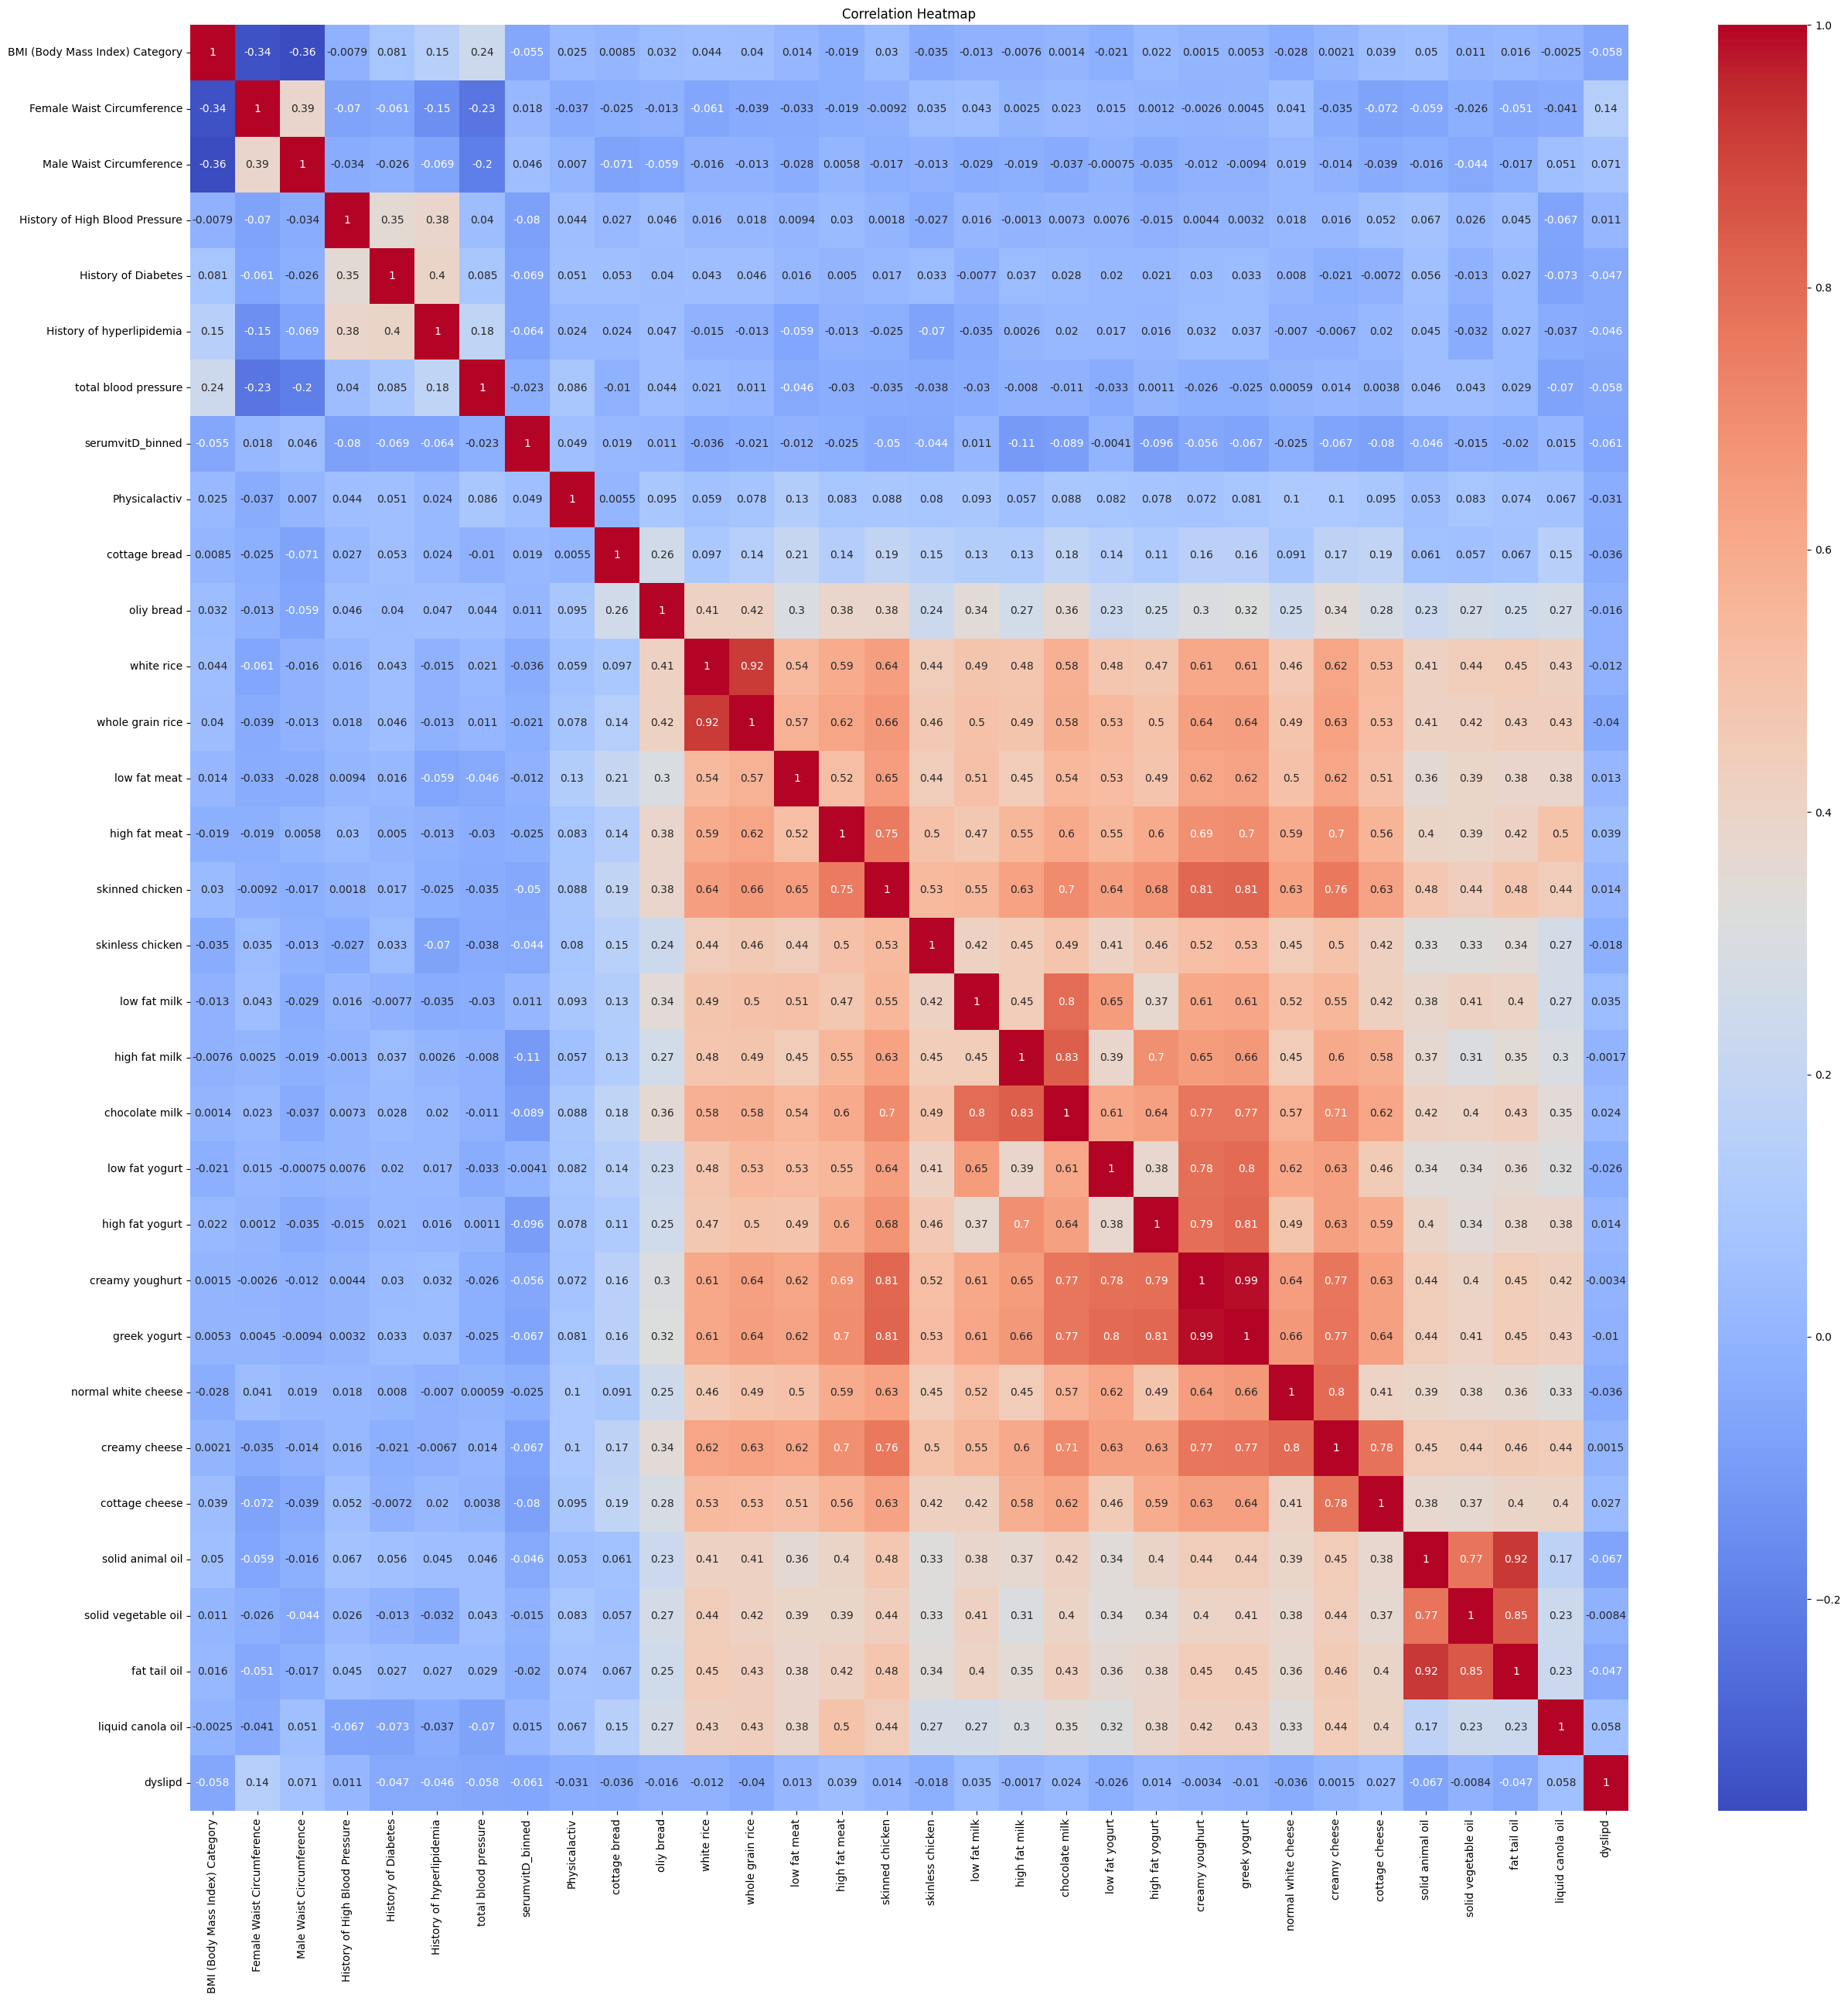

In [36]:
corr_m_100 = data[['BMI (Body Mass Index) Category', 'Female Waist Circumference', 'Male Waist Circumference', 
                           'History of High Blood Pressure', 'History of Diabetes', 'History of hyperlipidemia', 
                           'total blood pressure', 'serumvitD_binned', 'Physicalactiv','cottage bread', 'oliy bread',
                           'white rice', 'whole grain rice', 'low fat meat', 'high fat meat', 'skinned chicken', 
                           'skinless chicken', 'low fat milk', 'high fat milk', 'chocolate milk', 'low fat yogurt', 
                           'high fat yogurt', 'creamy youghurt', 'greek yogurt', 'normal white cheese', 'creamy cheese', 
                           'cottage cheese', 'solid animal oil', 'solid vegetable oil', 'fat tail oil', 'liquid canola oil', 
                           'dyslipd']].corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_m_100, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [38]:
p100_correlation = corr_m_100['dyslipd'].sort_values(ascending=False)

print(p100_correlation)

dyslipd                           1.000000
Female Waist Circumference        0.142766
Male Waist Circumference          0.070867
liquid canola oil                 0.057934
high fat meat                     0.039265
low fat milk                      0.035433
cottage cheese                    0.026959
chocolate milk                    0.024124
skinned chicken                   0.014128
high fat yogurt                   0.013928
low fat meat                      0.012501
History of High Blood Pressure    0.011078
creamy cheese                     0.001529
high fat milk                    -0.001655
creamy youghurt                  -0.003449
solid vegetable oil              -0.008390
greek yogurt                     -0.010492
white rice                       -0.011953
oliy bread                       -0.015679
skinless chicken                 -0.017753
low fat yogurt                   -0.026129
Physicalactiv                    -0.031437
cottage bread                    -0.035662
normal whit

### more than 50%

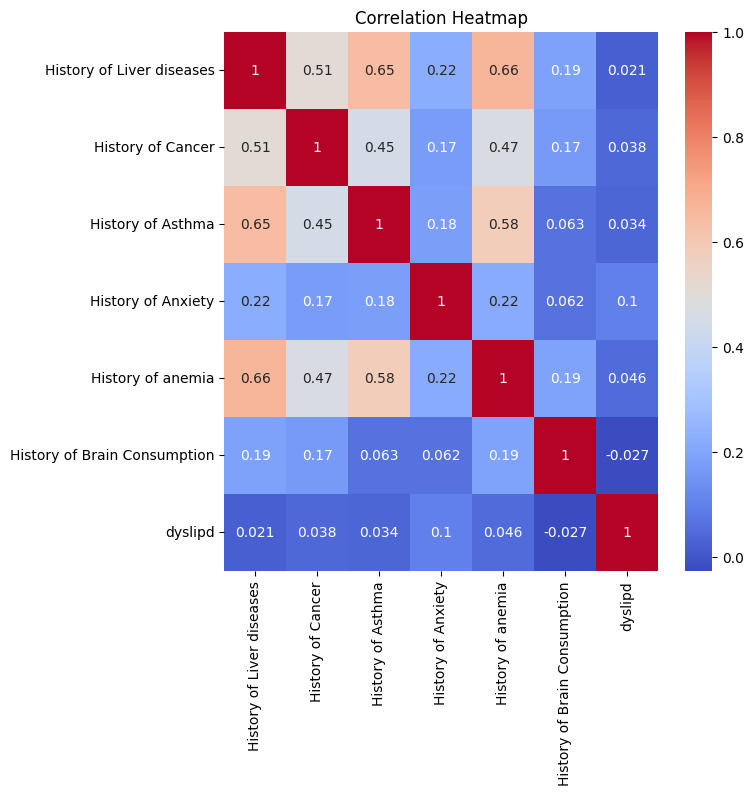

In [43]:
corr_m_50= data[['History of Liver diseases' , 'History of Cancer' ,'History of Asthma' , 'History of Anxiety' , 'History of anemia',
                   'History of Brain Consumption' , 'dyslipd']].corr()

plt.figure(figsize=(7, 7))
sns.heatmap(corr_m_50, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
p50_correlation = corr_m_50['dyslipd'].sort_values(ascending=False)

print(p50_correlation)

dyslipd                         1.000000
History of Anxiety              0.101288
History of anemia               0.046181
History of Cancer               0.037921
History of Asthma               0.034364
History of Liver diseases       0.020630
History of Brain Consumption   -0.026513
Name: dyslipd, dtype: float64


## Feature Selection

In [46]:
from sklearn.preprocessing import StandardScaler

selected_features = ['BMI (Body Mass Index) Category', 'Female Waist Circumference', 'Male Waist Circumference', 'History of High Blood Pressure',
                     'History of Diabetes', 'History of hyperlipidemia', 'total blood pressure', 'serumvitD_binned', 'Physicalactiv']

X_train_selected = X_tr_balanced_smote[selected_features]

scaler_standard = StandardScaler()

In [47]:
X_val_selected = X_val[selected_features]

## Model Training

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

###  Logistic Regression

In [54]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5)
logistic_grid_search.fit(X_train_selected, y_tr_balanced_smote)
logistic_best_model = logistic_grid_search.best_estimator_


logistic_val_predictions = logistic_best_model.predict(X_val_selected)
logistic_val_accuracy = accuracy_score(Y_val, logistic_val_predictions)


print("Logistic Regression:")
print("Best Parameters:", logistic_grid_search.best_params_)

print("Best Training Accuracy:", logistic_grid_search.best_score_)
print("Best Validation Accuracy:", logistic_val_accuracy)


Logistic Regression:
Best Parameters: {'C': 10}
Best Training Accuracy: 0.7154929577464789
Best Validation Accuracy: 0.7289719626168224


### Decision Tree

In [55]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_param_grid = {'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

tree_grid_search = GridSearchCV(tree_model, tree_param_grid, cv=5)
tree_grid_search.fit(X_train_selected, y_tr_balanced_smote)
tree_best_model = tree_grid_search.best_estimator_


tree_val_predictions = tree_best_model.predict(X_val_selected)
tree_val_accuracy = accuracy_score(Y_val, tree_val_predictions)



print("\nDecision Tree:")
print("Best Parameters:", tree_grid_search.best_params_)
print("Best Training Accuracy:", tree_grid_search.best_score_)
print("Best Validation Accuracy:", tree_val_accuracy)


Decision Tree:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Training Accuracy: 0.8056338028169014
Best Validation Accuracy: 0.8037383177570093


### Random Forrest

In [56]:
forest_model = RandomForestClassifier(random_state=42)
forest_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

forest_grid_search = GridSearchCV(forest_model, forest_param_grid, cv=5)
forest_grid_search.fit(X_train_selected, y_tr_balanced_smote)
forest_best_model = forest_grid_search.best_estimator_


forest_val_predictions = forest_best_model.predict(X_val_selected)
forest_val_accuracy = accuracy_score(Y_val, forest_val_predictions)


print("\nRandom Forest:")
print("Best Parameters:", forest_grid_search.best_params_)
print("Best Training Accuracy:", forest_grid_search.best_score_)
print("Best Validation Accuracy:", forest_val_accuracy)


Random Forest:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Training Accuracy: 0.8295774647887324
Best Validation Accuracy: 0.7663551401869159


### Support Vector Machines (SVM)

In [58]:
svm_model = SVC(random_state=42)
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train_selected, y_tr_balanced_smote)
svm_best_model = svm_grid_search.best_estimator_



svm_val_predictions = svm_best_model.predict(X_val_selected)
svm_val_accuracy = accuracy_score(Y_val, svm_val_predictions)

print("Support Vector Machine:")
print("Best Parameters:", svm_grid_search.best_params_)
print("Best Training Accuracy:", svm_grid_search.best_score_)
print("Best Validation Accuracy:", svm_val_accuracy)

Support Vector Machine:
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Training Accuracy: 0.7816901408450703
Best Validation Accuracy: 0.8037383177570093


### Gradient Boosting Machines (GBM)

In [61]:
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 5, 7]}

gbm_grid_search = GridSearchCV(gbm_model, gbm_param_grid, cv=5)
gbm_grid_search.fit(X_train_selected, y_tr_balanced_smote)
gbm_best_model = gbm_grid_search.best_estimator_


gbm_val_predictions = gbm_best_model.predict(X_val_selected)
gbm_val_accuracy = accuracy_score(Y_val, gbm_val_predictions)


print("Gradient Boosting Machine:")
print("Best Parameters:", gbm_grid_search.best_params_)
print("Best Training Accuracy:", gbm_grid_search.best_score_)
print("Best Validation Accuracy:", gbm_val_accuracy)

Gradient Boosting Machine:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Training Accuracy: 0.8408450704225352
Best Validation Accuracy: 0.794392523364486


### K-Nearest Neighbors (KNN)

In [63]:
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train_selected, y_tr_balanced_smote)
knn_best_model = knn_grid_search.best_estimator_


knn_val_predictions = knn_best_model.predict(X_val_selected)
knn_val_accuracy = accuracy_score(Y_val, knn_val_predictions)


print("K-Nearest Neighbors:")
print("Best Parameters:", knn_grid_search.best_params_)
print("Best Training Accuracy:", knn_grid_search.best_score_)
print("Best Validation Accuracy:", knn_val_accuracy)

K-Nearest Neighbors:
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Best Training Accuracy: 0.7859154929577464
Best Validation Accuracy: 0.7476635514018691


### AdaBoost

In [64]:
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}

adaboost_grid_search = GridSearchCV(adaboost_model, adaboost_param_grid, cv=5)
adaboost_grid_search.fit(X_train_selected, y_tr_balanced_smote)
adaboost_best_model = adaboost_grid_search.best_estimator_


adaboost_val_predictions = adaboost_best_model.predict(X_val_selected)
adaboost_val_accuracy = accuracy_score(Y_val, adaboost_val_predictions)

print("AdaBoost:")
print("Best Parameters:", adaboost_grid_search.best_params_)
print("Best Training Accuracy:", adaboost_grid_search.best_score_)
print("Best Validation Accuracy:", adaboost_val_accuracy)

AdaBoost:
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 200}
Best Training Accuracy: 0.8253521126760563
Best Validation Accuracy: 0.8130841121495327


### XGBoost

In [65]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0], 'max_depth': [3, 5, 7]}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_selected, y_tr_balanced_smote)
xgb_best_model = xgb_grid_search.best_estimator_


xgb_val_predictions = xgb_best_model.predict(X_val_selected)
xgb_val_accuracy = accuracy_score(Y_val, xgb_val_predictions)

print("XGBoost:")
print("Best Parameters:", xgb_grid_search.best_params_)
print("Best Training Accuracy:", xgb_grid_search.best_score_)
print("Best Validation Accuracy:", xgb_val_accuracy)

XGBoost:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best Training Accuracy: 0.8492957746478872
Best Validation Accuracy: 0.794392523364486


## Model Evaluation

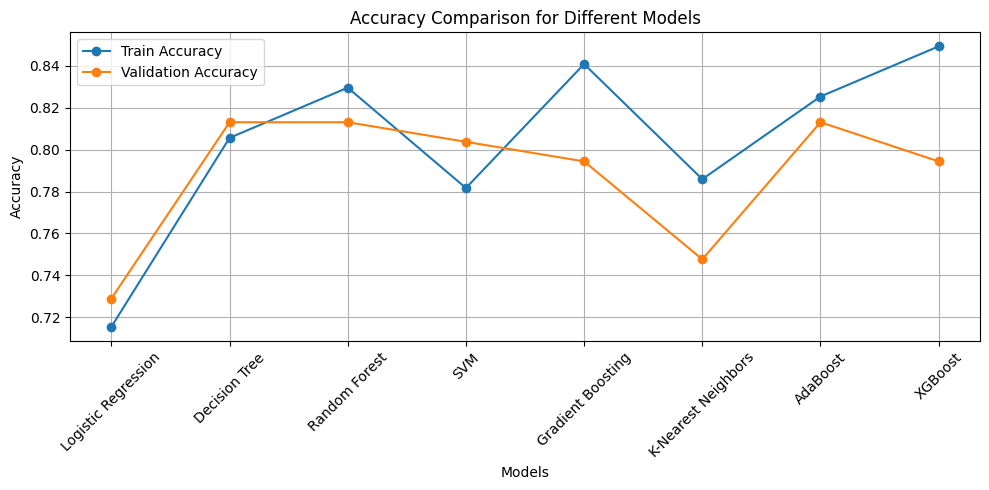

In [91]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting','K-Nearest Neighbors', 'AdaBoost', 'XGBoost']
train_accuracies = [logistic_grid_search.best_score_, tree_grid_search.best_score_, forest_grid_search.best_score_, svm_grid_search.best_score_, gbm_grid_search.best_score_, knn_grid_search.best_score_, adaboost_grid_search.best_score_, xgb_grid_search.best_score_]
val_accuracies = [logistic_val_accuracy, tree_val_accuracy, forest_val_accuracy, svm_best_model.score(X_val_selected, Y_val), gbm_best_model.score(X_val_selected,Y_val), knn_best_model.score(X_val_selected, Y_val), adaboost_best_model.score(X_val_selected, Y_val), xgb_best_model.score(X_val_selected, Y_val)]

plt.figure(figsize=(10, 5))
plt.plot(models, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(models, val_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Models')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()